In [ ]:
# weights.h5 file has been added to drive update path to it over here to use the saved weights
model = keras.models.load_model('/content/weight.h5')

In [ ]:
# change i over here to get results corresponding to benefits[i]
# asan[i] denotes the asan coreesponding to it in the book
# i=69
# y = model.predict(benefits[i])
# z = np.sum(y,axis=0)
# z = z/50
# asan[i]

In [ ]:
# Gives the number of asan with max probability and its probability 
# max=0
# max_i=0
# for i in range(239):
#   if z[i]>max:
#     max=z[i]
#     max_i=i
# print(max)
# print(max_i+1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/final_asan1_1.csv'
# data = 'final_asan1.csv'

In [ ]:
import re
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
benefits = []
contra = []
asan = []

In [ ]:
import csv

with open(data,'r') as file:
  reader = csv.reader(file)
  for row in reader:
    benefits.append(row[5])
    contra.append(row[6])
    asan.append(row[1])

In [ ]:
input_1=[]
input_2=[]
output=[]
data = []

In [ ]:
for i in range (len(benefits)):
  line = benefits[i]
  line = line.lower()
  line = re.sub(r'[^A-Za-z\n]+', ' ', line)
  line = remove_stopwords(line)
  line = line.replace("benefits","")
  input_1.append(line)
  data.append(line)
  line = contra[i]
  line = line.lower()
  line = re.sub(r'[^A-Za-z\n]+', ' ', line)
  line = remove_stopwords(line)
  line = line.replace("contra","")
  line = line.replace("indications","")
  input_2.append(line)
  data.append(line)
  line = asan[i]
  line = line.replace(" ","")
  output.append(line)

In [ ]:
input_1[1]

' technique increases awareness sensitivity breath nostrils minor blockages removed flow breath nostrils balanced breathing left nostril tends activate right brain hemisphere breathing right nostril activates left hemisphere long slow balanced breathing stage profound effects calming balancing energies practice  technique gives pronounced balancing breath brain hemispheres calming effects relieves anxiety improves concentration stimulates ajna chakra ratio stage establishes calming rhythm brain heart assisting people cardiovascular nervous disorders specifically stress related condi tions generally count extended breath slows respiration efficient air flow smoother turbulent ratio helps people respiratory problems asthma emphysema bronchitis ratio stage gives profound relaxation heartbeat pulse rate slow blood pressure drops extension count built slowly technique  inner retention breath characterizes technique activates brain centres harmonizes pranas  increase progression ratios ratio

In [ ]:
input_2[1]

'  nadi shodhana practised suffering colds flu fever   stage technique begins process ofintroversion recommended fora depressed withdrawn person extension stage involving longer counts recommended people heart problems   technique suitable women later half pregnancy recommended persons heart problems high blood pressure emphy sema major disorders stage recommended asthmatics   people suffering low blood pressure respiratory disorders asthma bronchitis excessive mucous practise pranayama heart disease practise breath retention practice cools activity lower energy centres suffering chronic stipation avoid generally pranayama practised winter cool climates'

In [ ]:
output[1]

'ABDOMINALBREATHING'

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
import keras.backend as K
import numpy as np

oov_token = "<OOV>" 
embed_size = 20

In [ ]:
tokenizer = Tokenizer(oov_token=oov_token)
tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(data)

print(len(word_index))

2349


In [ ]:
vocab_size = len(word_index)

In [ ]:
index_to_word_map = {}
for word,index in word_index.items():
  index_to_word_map[index] = word

In [ ]:
print('Vocabulary Sample:', list(word_index.items()))

Vocabulary Sample: [('<OOV>', 1), ('asana', 2), ('practice', 3), ('people', 4), ('muscles', 5), ('blood', 6), ('body', 7), ('pressure', 8), ('organs', 9), ('high', 10), ('practise', 11), ('abdominal', 12), ('heart', 13), ('asanas', 14), ('suffering', 15), ('helps', 16), ('strengthens', 17), ('practised', 18), ('sciatica', 19), ('balance', 20), ('tones', 21), ('legs', 22), ('energy', 23), ('problems', 24), ('nerves', 25), ('spine', 26), ('hernia', 27), ('arms', 28), ('mudra', 29), ('nervous', 30), ('stimulates', 31), ('neck', 32), ('conditions', 33), ('improves', 34), ('meditation', 35), ('slipped', 36), ('disc', 37), ('lower', 38), ('position', 39), ('spinal', 40), ('forward', 41), ('mind', 42), ('stretches', 43), ('inverted', 44), ('right', 45), ('pelvic', 46), ('variation', 47), ('performed', 48), ('knees', 49), ('pose', 50), ('develops', 51), ('digestive', 52), ('bending', 53), ('shoulders', 54), ('postures', 55), ('brain', 56), ('pregnancy', 57), ('especially', 58), ('perform', 59)

In [ ]:
print(index_to_word_map[2349])

performing


In [ ]:
len(sequence)

476

In [ ]:
tokenizer2 = Tokenizer(oov_token=oov_token)
tokenizer2.fit_on_texts(output)
word_index2 = tokenizer2.word_index
sequence2 = tokenizer2.texts_to_sequences(output)

print(len(word_index2)) 

239


In [ ]:
print('Vocabulary Sample:', list(word_index2.items()))

Vocabulary Sample: [('<OOV>', 1), ('aname', 2), ('abdominalbreathing', 3), ('advasana', 4), ('agnisarakriya', 5), ('akarnadhanurasana', 6), ('akashimudra', 7), ('anandamadirasana', 8), ('ardhachandrasana', 9), ('ardhamatsyendrasana', 10), ('ardhapadmahalasana', 11), ('ardhapadmasana', 12), ('ardhashalabhasana', 13), ('ardhatitaliasana', 14), ('ardhaushtrasanaenero', 15), ('ashwasanchalanasana', 16), ('ashwinimudra', 17), ('astavakrasana', 18), ('baddhapadmasana', 19), ('bakadhyanasana', 20), ('bakasana', 21), ('bandhahastautthanasana', 22), ('bhadrasana', 23), ('bhairavamudra', 24), ('bhastrikapranayama', 25), ('bhoocharimudra', 26), ('bhramaripranayama', 27), ('bhunamanasana', 28), ('bhujangasana', 29), ('bhujanginimudra', 30), ('bhumipadamastakasana', 31), ('brahmacharyasana', 32), ('chakkichalanasana', 33), ('chakrasana', 34), ('chandranamaskara', 35), ('chinmudra', 36), ('dakshinanauli', 37), ('dhanurakarshanasana', 38), ('dhanurasana', 39), ('dhyanaveerasana', 40), ('dolasana', 41

In [ ]:
vocab_size2 = len(word_index2)

In [ ]:
index_to_word_map2 = {}
for word,index in word_index2.items():
  index_to_word_map2[index] = word

In [ ]:
index_to_word_map2[3]

'abdominalbreathing'

In [ ]:
benefits = []
contra = []
asan = []

In [ ]:
for i in range (2,len(sequence)):
  if i%2==0:
    benefits.append(sequence[i])
  else:
    contra.append(sequence[i])

for i in range (1,len(sequence2)):
  asan.append(sequence2[i])

In [ ]:
len(asan)

237

In [ ]:
asan = np.asarray(asan)
np.shape(asan)

(237, 1)

In [ ]:
y = asan - 1
y = tf.keras.utils.to_categorical(y,239)

In [ ]:
print(asan[8])
print(y[8])

[11]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
np.shape(y)

(237, 239)

In [ ]:
benefits = pad_sequences(benefits,50,padding='post',truncating='pre')

In [ ]:
(benefits[15])

array([  23,  179,   71,  380,  381,  447, 1304,   17,  284,  175,   74,
          5,    5,   89,  176, 1305,  659,  285,  882,  100, 1306,  534,
       1307, 1308,  285, 1309,  251,  883,  884, 1310, 1311, 1312, 1313,
       1314, 1315,  285, 1316,  884, 1317, 1318, 1319,  885, 1320, 1321,
        886,  885, 1322, 1323, 1324,  882], dtype=int32)

In [ ]:
benefits = np.array(benefits)
contra = np.array(contra)
np.shape(benefits)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(237, 50)

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda, Flatten, Reshape
import tensorflow as tf

model = Sequential()
model.add(Embedding(2350,20,input_length=50))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
model.add(Dense(vocab_size2, activation='softmax'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 20)            47000     
_________________________________________________________________
lambda (Lambda)              (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 239)               5019      
Total params: 52,019
Trainable params: 52,019
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(benefits,y,epochs=500,batch_size=32)

Epoch 1/500
8/8 [==============================] - 17s 4ms/step - loss: 5.4783 - accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 5.4750 - accuracy: 0.0352
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 5.4734 - accuracy: 0.0512
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 5.4716 - accuracy: 0.0640
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 5.4701 - accuracy: 0.1029
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 5.4683 - accuracy: 0.1291
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 5.4655 - accuracy: 0.1989
Epoch 8/500
8/8 [==============================] - 0s 4ms/step - loss: 5.4628 - accuracy: 0.1999
Epoch 9/500
8/8 [==============================] - 0s 4ms/step - loss: 5.4597 - accuracy: 0.1993
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 5.4576 - accuracy: 0.2305
Epoch 11/500
8/8 [======

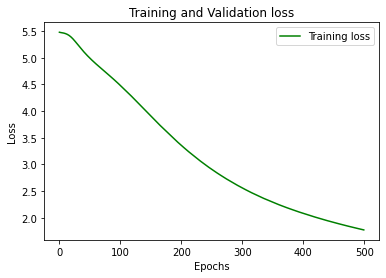

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
i=69
y = model.predict(benefits[i])
z = np.sum(y,axis=0)
z = z/50
asan[i]

array([72])

In [ ]:
max=0
max_i=0
for i in range(239):
  if z[i]>max:
    max=z[i]
    max_i=i
print(max)
print(max_i+1)

0.3319436
72


In [ ]:
model.save('/content/drive/MyDrive/yrs/weight.h5')

In [ ]:
!pip install tfdeploy
import tfdeploy as td


  Created wheel for tfdeploy: filename=tfdeploy-0.4.2-cp37-none-any.whl size=14659 sha256=1b6413b71ef2bae139637e4f8dc2d80b635054d402488e20f0c952961b1ab6de
  Stored in directory: /root/.cache/pip/wheels/dd/52/76/1cc95fff7cf5f9548f694fb331eb5645e64ba9ea68becfef39
Successfully built tfdeploy
